In [ ]:
# Mengimpor library-library yang digunakan
import numpy as np # untuk aljabar linear
import pandas as pd # pemrosesan data, pembacaan file CSV I/O (contoh: pd.read_csv)
import matplotlib.pyplot as plt # untuk visualisasi
import datetime

In [ ]:
from keras.layers import Dense, LSTM
import tensorflow as tf

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Menyesuaikan path dengan lokasi dataset yang digunakan
dataset=pd.read_csv('/content/drive/MyDrive/Proa-ML/Demo/Dataset/Sample - Superstore.csv', encoding='windows-1252')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
dataset.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [ ]:
dataset.Category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [ ]:
dataset["Ship Mode"].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

In [ ]:
dataset["Segment"].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [ ]:
dataset["Region"].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [ ]:
dataset.shape

(9994, 21)

In [ ]:
dataset['Order Date'] = pd.to_datetime(dataset['Order Date'], format='%m/%d/%Y') #mengonversi tipe data dari kolom 'Order Date' atau tanggal pemesanan menjadi format tanggal.
dataset['Ship Date'] = pd.to_datetime(dataset['Ship Date'], format='%m/%d/%Y') #mengonversi tipe data dari kolom 'Ship Date' atau tanggal pengiriman menjadi format tanggal.
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [ ]:
dataset['Order Date'].min(), dataset['Order Date'].max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [ ]:
# Mengekstrak dataset sesuai kebutuhan
office_supplies = dataset.loc[dataset['Category'] == 'Office Supplies']


In [ ]:
dataset_sales = dataset

In [ ]:
dataset_sales = dataset_sales[['Order Date','Sales']]

In [ ]:
dataset_sales.head()


,Order Date,Sales
0,2016-11-08,261.9600
1,2016-11-08,731.9400
2,2016-06-12,14.6200
3,2015-10-11,957.5775
4,2015-10-11,22.3680


In [ ]:
dataset_sales = dataset_sales.sort_values('Order Date')
dataset_sales = dataset_sales.groupby('Order Date')['Sales'].sum().reset_index()
dataset_sales.head()


,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,4407.100
4,2014-01-07,87.158


In [ ]:
dataset_sales = dataset_sales.set_index('Order Date')
dataset_sales.head()


,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,4407.100
2014-01-07,87.158


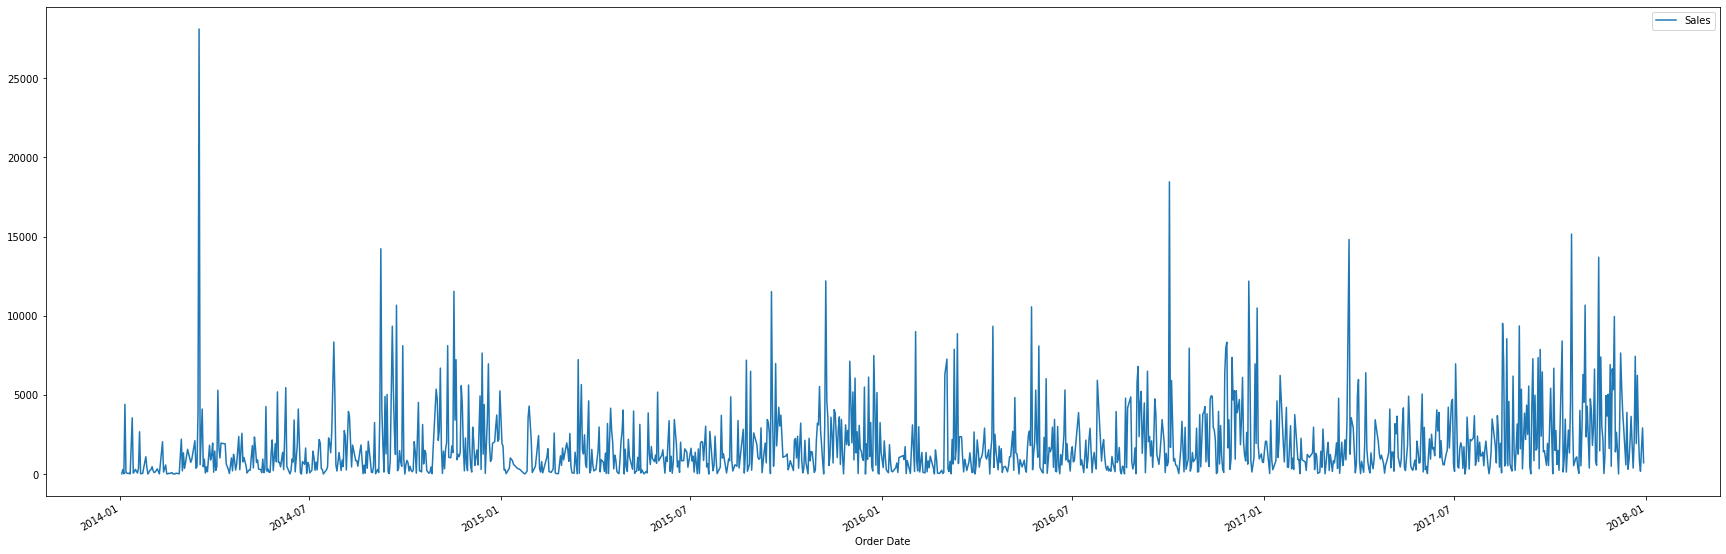

In [ ]:
dataset_sales.plot(figsize=(30, 10));

In [ ]:
dataset_sales =  pd.DataFrame(dataset_sales['Sales'].resample('D').mean()) #Data diresample dengan aturan D alias hari
dataset_sales = dataset_sales.interpolate(method='linear') #Fungsi interpolate() digunakan untuk melakukan interpolasi secara linear.

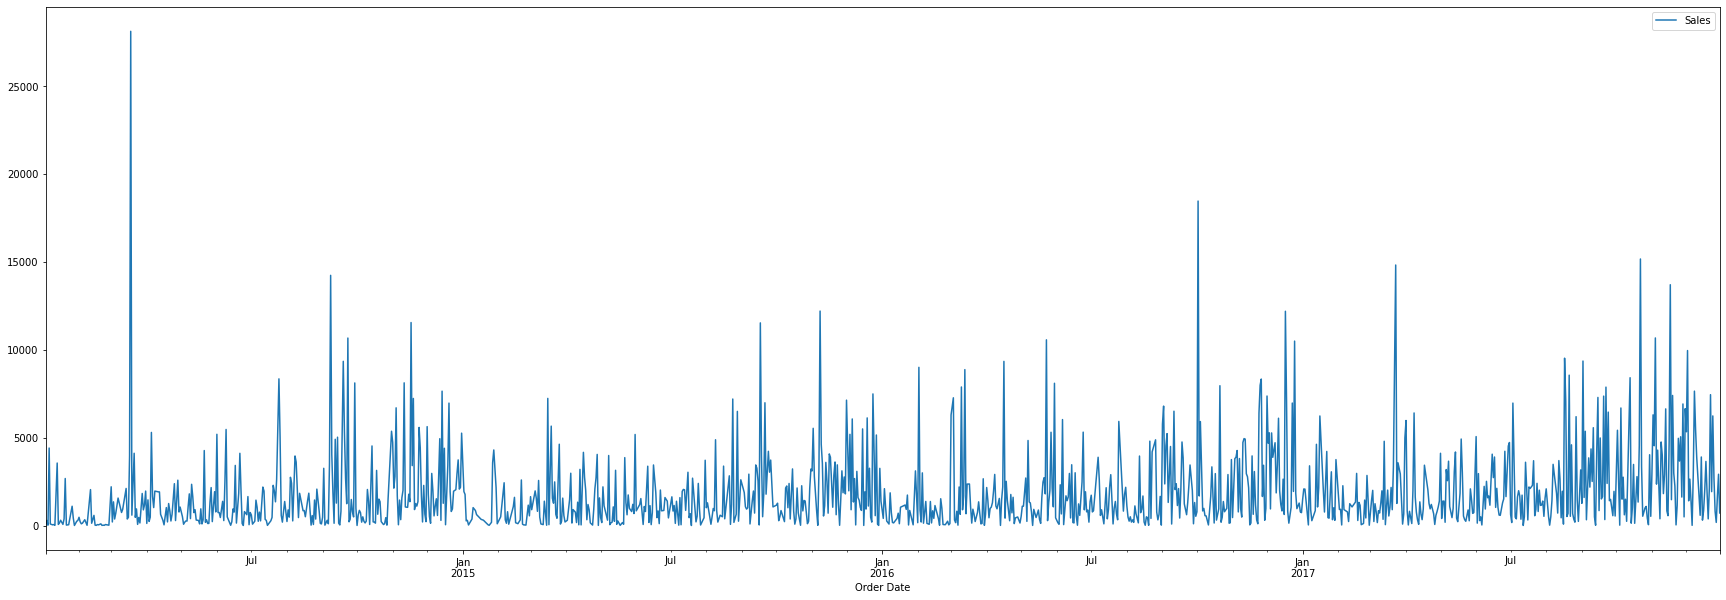

In [ ]:
dataset_sales.plot(figsize=(30, 10));

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


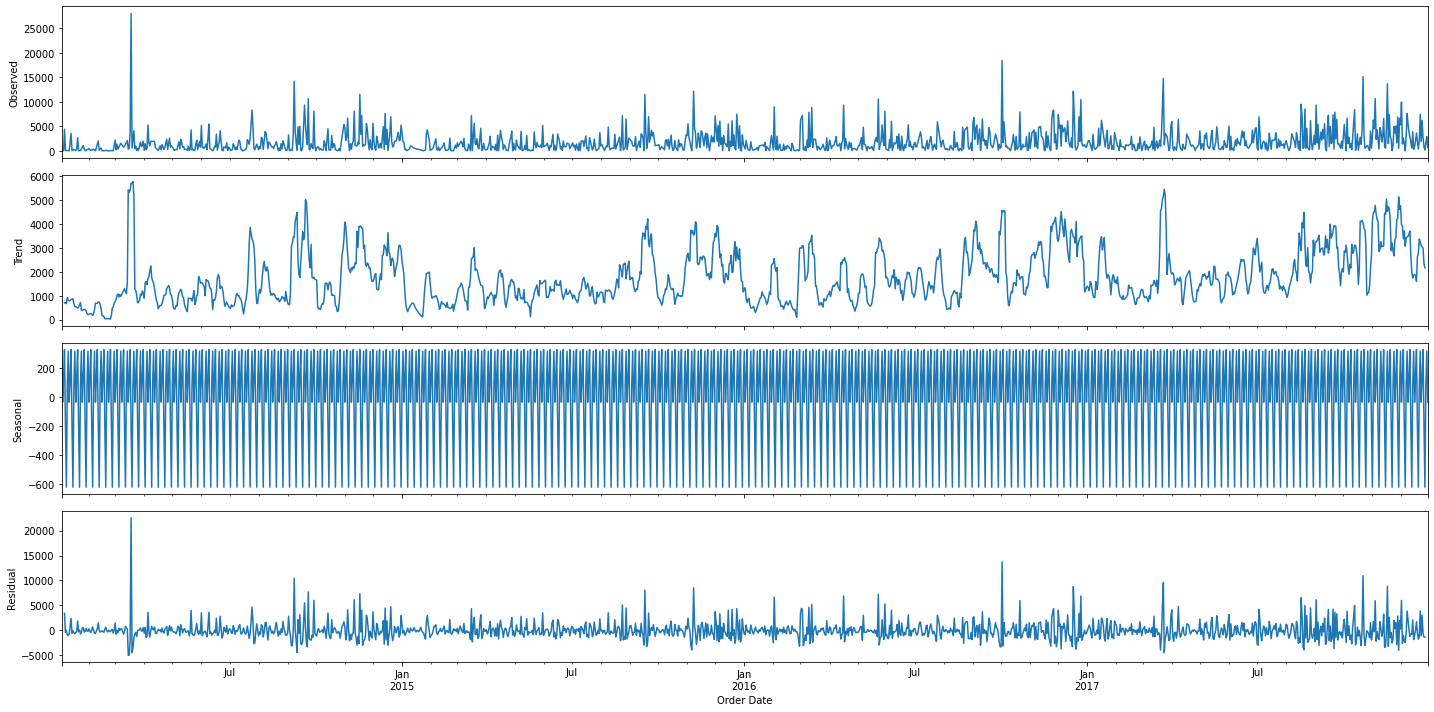

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 10

import statsmodels.api as sm
decomposition = sm.tsa.seasonal_decompose(dataset_sales, model='additive') #function used to decompose Time Series Data into Trend and Seasonality
fig = decomposition.plot()
plt.show();

In [ ]:
order_dates = dataset_sales.index.values
sales  = dataset_sales['Sales'].values

In [ ]:
sales.shape

(1458,)

In [ ]:
max_sales = sales.max()
min_sales = sales.min()
sales_scale = max_sales-min_sales
sales_scale_mae = sales_scale * 0.001

print("max_sales =", max_sales)
print("min_sales =", min_sales)
print("sales_scale =", sales_scale)
print("0.001 skala data =", sales_scale_mae)

max_sales = 28106.715999999997
min_sales = 2.025
sales_scale = 28104.690999999995
0.001 skala data = 28.104690999999995


In [ ]:
sales_train = sales[:int(len(sales)*0.8)]
sales_valid = sales[int(len(sales)*0.8):]

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae') < sales_scale_mae and logs.get('val_mae') < sales_scale_mae):
      print("\nMAE dari model < 0.001 skala data")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
#Cara 1
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)


In [ ]:
sales_train_2 = dataset_sales[:int(len(sales)*0.8)]
sales_valid_2 = dataset_sales[int(len(sales)*0.8):]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(sales_train_2)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1166):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
validation_set_scaled = sc.fit_transform(sales_valid_2)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_valid = []
y_valid = []
for i in range(60, len(validation_set_scaled)):
    X_valid.append(validation_set_scaled[i-60:i, 0])
    y_valid.append(validation_set_scaled[i, 0])
X_valid, y_valid = np.array(X_valid), np.array(y_valid)

# Reshaping
X_valid = np.reshape(X_valid, (X_valid.shape[0], X_valid.shape[1], 1))

In [ ]:
#Cara 1
train_set = windowed_dataset(sales_train, window_size=60, batch_size=100, shuffle_buffer=1000)
valid_set = windowed_dataset(sales_valid, window_size=60, batch_size=100, shuffle_buffer=1000)
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
])

In [ ]:
#Cara 2

# Initialising the RNN
model = Sequential()
# Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 64, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.3))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 64, return_sequences = True))
model.add(Dropout(0.3))
# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 64,return_sequences = True))
model.add(Dropout(0.3))
# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 64))
model.add(Dropout(0.3))
# Adding the output layer
model.add(Dense(units = 1))


In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate=1.0000e-04, momentum=0.9)

model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

history = model.fit(train_set,epochs=100, validation_data = valid_set, callbacks=callbacks)

Epoch 1/100
12/12 [==============================] - 7s 265ms/step - loss: 1676.1567 - mae: 1676.6567 - val_loss: 2545.2588 - val_mae: 2545.7588
Epoch 2/100
12/12 [==============================] - 2s 130ms/step - loss: 1676.1124 - mae: 1676.6124 - val_loss: 2545.2065 - val_mae: 2545.7065
Epoch 3/100
12/12 [==============================] - 2s 131ms/step - loss: 1676.0641 - mae: 1676.5641 - val_loss: 2545.1648 - val_mae: 2545.6648
Epoch 4/100
12/12 [==============================] - 2s 126ms/step - loss: 1676.0215 - mae: 1676.5215 - val_loss: 2545.1260 - val_mae: 2545.6260
Epoch 5/100
12/12 [==============================] - 2s 132ms/step - loss: 1675.9838 - mae: 1676.4838 - val_loss: 2545.0881 - val_mae: 2545.5881
Epoch 6/100
12/12 [==============================] - 2s 131ms/step - loss: 1675.9445 - mae: 1676.4445 - val_loss: 2545.0486 - val_mae: 2545.5486
Epoch 7/100
12/12 [==============================] - 3s 215ms/step - loss: 1675.9027 - mae: 1676.4027 - val_loss: 2545.0054 - val_

In [ ]:
#Cara 2
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
epoch = 10 
batch_size = 32
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs = epoch, batch_size = batch_size)

Epoch 1/10
35/35 [==============================] - 21s 238ms/step - loss: 0.0055 - val_loss: 0.0320
Epoch 2/10
35/35 [==============================] - 5s 140ms/step - loss: 0.0055 - val_loss: 0.0309
Epoch 3/10
35/35 [==============================] - 5s 140ms/step - loss: 0.0055 - val_loss: 0.0301
Epoch 4/10
35/35 [==============================] - 5s 141ms/step - loss: 0.0055 - val_loss: 0.0302
Epoch 5/10
35/35 [==============================] - 5s 142ms/step - loss: 0.0055 - val_loss: 0.0305
Epoch 6/10
35/35 [==============================] - 5s 140ms/step - loss: 0.0056 - val_loss: 0.0331
Epoch 7/10
35/35 [==============================] - 5s 141ms/step - loss: 0.0055 - val_loss: 0.0319
Epoch 8/10
35/35 [==============================] - 5s 141ms/step - loss: 0.0055 - val_loss: 0.0329
Epoch 9/10
35/35 [==============================] - 7s 213ms/step - loss: 0.0056 - val_loss: 0.0324
Epoch 10/10
35/35 [==============================] - 5s 149ms/step - loss: 0.0055 - val_loss: 0.032

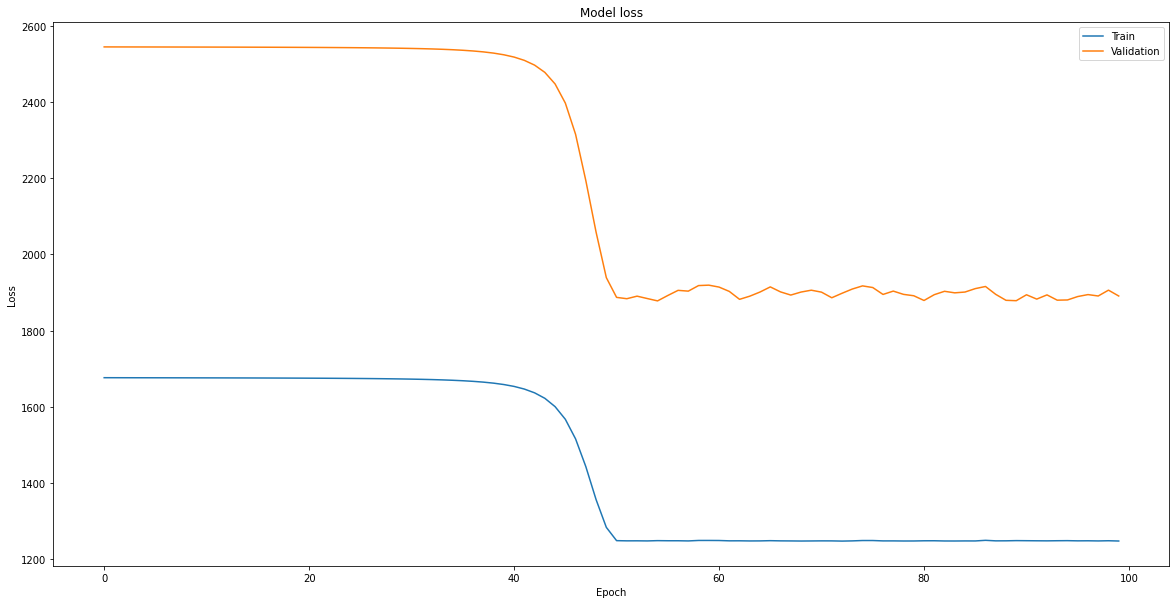

In [ ]:
#Cara 1
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

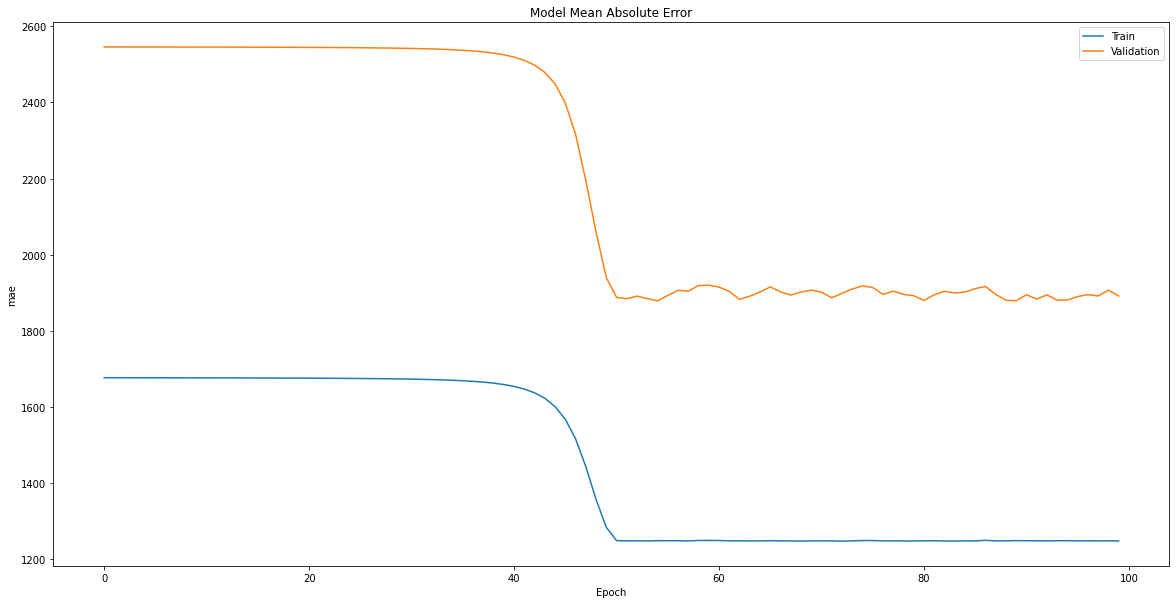

In [ ]:
#Cara 1
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('Model Mean Absolute Error')
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
base = datetime.datetime.today()
date_list = [base - datetime.timedelta(days=x) for x in range(100)]


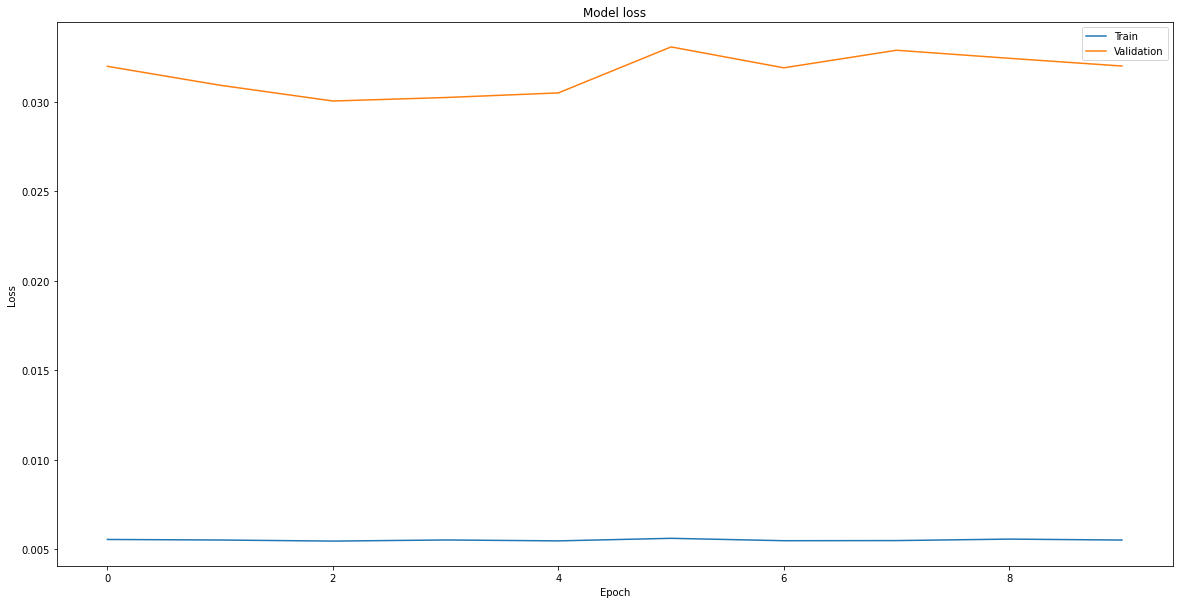

In [ ]:
#Cara 2
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [ ]:
date_list_arr = np.array(date_list)

In [ ]:
from datetime import datetime, timedelta

tanggal_prediksi = np.arange(datetime(2017,12,31), datetime(2018,12,31), timedelta(days=1)).astype(datetime)

In [ ]:
predict = model.predict(train_set)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
predict.shape

(1106, 1)